In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ls *.csv

date_table.csv  homes-91325.csv


In [5]:
data = pd.read_csv("date_table.csv")
data[:10]

,Unnamed: 0,date_dt,total_cases,new_case,total_deaths,new_deaths,total_persons_tested,new_persons_tested
0,1,2020-05-17,36459,42,1719,2,NaN,NaN
1,2,2020-05-16,36417,110,1717,11,309295.0,309.0
2,3,2020-05-15,36307,324,1706,14,308986.0,1556.0
3,4,2020-05-14,35983,371,1692,20,307430.0,3624.0
4,5,2020-05-13,35612,517,1672,29,303806.0,6130.0
5,6,2020-05-12,35095,884,1643,41,297676.0,6781.0
6,7,2020-05-11,34211,1172,1602,20,290895.0,6688.0
7,8,2020-05-10,33039,295,1582,29,284207.0,1973.0
8,9,2020-05-09,32744,572,1553,41,282234.0,2874.0
9,10,2020-05-08,32172,853,1512,41,279360.0,6675.0


1. Drop most recent 4 days because the data is not reported yet
2. Reverse order of data so it is in chronological order
3. look at new deaths as a function of date

In [9]:
dates=np.array(data["date_dt"])[::-1] # dates in reverse order
dates

array(['2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13',
       '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17',
       '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-21',
       '2020-03-22', '2020-03-23', '2020-03-24', '2020-03-25',
       '2020-03-26', '2020-03-27', '2020-03-28', '2020-03-29',
       '2020-03-30', '2020-03-31', '2020-04-01', '2020-04-02',
       '2020-04-03', '2020-04-04', '2020-04-05', '2020-04-06',
       '2020-04-07', '2020-04-08', '2020-04-09', '2020-04-10',
       '2020-04-11', '2020-04-12', '2020-04-13', '2020-04-14',
       '2020-04-15', '2020-04-16', '2020-04-17', '2020-04-18',
       '2020-04-19', '2020-04-20', '2020-04-21', '2020-04-22',
       '2020-04-23', '2020-04-24', '2020-04-25', '2020-04-26',
       '2020-04-27', '2020-04-28', '2020-04-29', '2020-04-30',
       '2020-05-01', '2020-05-02', '2020-05-03', '2020-05-04',
       '2020-05-05', '2020-05-06', '2020-05-07', '2020-05-08',
       '2020-05-09', '2020-05-10', '2020-05-11', '2020-

In [13]:
y=np.array(data["new_deaths"])[::-1] # deaths in reversed order
y

array([ 1,  0,  0,  0,  0,  0,  0,  0,  0,  4,  3,  3,  4,  7,  3,  6,  5,
        9,  8, 15, 11, 16, 18, 22, 26, 21, 24, 17, 26, 39, 36, 30, 30, 37,
       42, 49, 34, 60, 38, 39, 36, 48, 40, 46, 48, 42, 39, 40, 36, 51, 37,
       40, 35, 46, 40, 40, 35, 43, 46, 41, 41, 29, 20, 41, 29, 20, 14, 11,
        2])

1. ignore the first death on March 10
2. Assume the data goes from march 19 through May 13

In [14]:
yvals=y[9:-4] # drop first y and last 4
xvals=dates[9:-4]

In [15]:
print(xvals, yvals)

['2020-03-19' '2020-03-20' '2020-03-21' '2020-03-22' '2020-03-23'
 '2020-03-24' '2020-03-25' '2020-03-26' '2020-03-27' '2020-03-28'
 '2020-03-29' '2020-03-30' '2020-03-31' '2020-04-01' '2020-04-02'
 '2020-04-03' '2020-04-04' '2020-04-05' '2020-04-06' '2020-04-07'
 '2020-04-08' '2020-04-09' '2020-04-10' '2020-04-11' '2020-04-12'
 '2020-04-13' '2020-04-14' '2020-04-15' '2020-04-16' '2020-04-17'
 '2020-04-18' '2020-04-19' '2020-04-20' '2020-04-21' '2020-04-22'
 '2020-04-23' '2020-04-24' '2020-04-25' '2020-04-26' '2020-04-27'
 '2020-04-28' '2020-04-29' '2020-04-30' '2020-05-01' '2020-05-02'
 '2020-05-03' '2020-05-04' '2020-05-05' '2020-05-06' '2020-05-07'
 '2020-05-08' '2020-05-09' '2020-05-10' '2020-05-11' '2020-05-12'
 '2020-05-13'] [ 4  3  3  4  7  3  6  5  9  8 15 11 16 18 22 26 21 24 17 26 39 36 30 30
 37 42 49 34 60 38 39 36 48 40 46 48 42 39 40 36 51 37 40 35 46 40 40 35
 43 46 41 41 29 20 41 29]


In [16]:
len(xvals), len(yvals)

(56, 56)

In [17]:
x=np.array(range(len(xvals))) # number of days into data

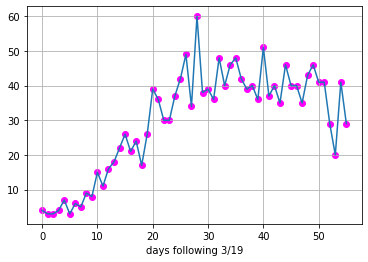

In [21]:
plt.scatter(x, yvals, marker="o",color="magenta")
plt.xlabel("days following 3/19")
plt.plot(x,yvals)
plt.grid()

In [22]:
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55])

In [23]:
yvals

array([ 4,  3,  3,  4,  7,  3,  6,  5,  9,  8, 15, 11, 16, 18, 22, 26, 21,
       24, 17, 26, 39, 36, 30, 30, 37, 42, 49, 34, 60, 38, 39, 36, 48, 40,
       46, 48, 42, 39, 40, 36, 51, 37, 40, 35, 46, 40, 40, 35, 43, 46, 41,
       41, 29, 20, 41, 29])

In [24]:
# calculate a polynomial of degree 1

In [32]:
b,a=np.polyfit(x, yvals,1)
a,b

(10.637218045112789, 0.698257006151743)

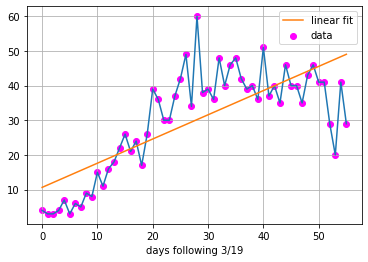

In [34]:
plt.scatter(x, yvals, marker="o",color="magenta", label="data")
plt.xlabel("days following 3/19")
plt.plot(x,yvals)
plt.plot([0,55],[a+b*0,a+b*55],label="linear fit")
plt.grid()
plt.legend()

1. Not a great fit
2. Problem: we used up all the data, no way to do any testing

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error # sum squares (y_i - f(x_i))^2 over test data

In [36]:
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55])

In [37]:
yvals

array([ 4,  3,  3,  4,  7,  3,  6,  5,  9,  8, 15, 11, 16, 18, 22, 26, 21,
       24, 17, 26, 39, 36, 30, 30, 37, 42, 49, 34, 60, 38, 39, 36, 48, 40,
       46, 48, 42, 39, 40, 36, 51, 37, 40, 35, 46, 40, 40, 35, 43, 46, 41,
       41, 29, 20, 41, 29])

In [43]:
# create test and training sets
xtrain, xtest, ytrain, ytest = train_test_split(x, yvals)

# create the model coefficients with xtrain and ytrain

# test the model coeffcients with xtest and ytest

In [44]:
len(xtrain), len(xtest), len(ytrain), len(ytest)

(42, 14, 42, 14)

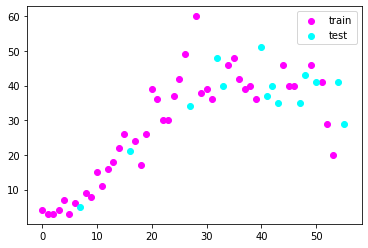

In [45]:
plt.scatter(xtrain,ytrain,label="train",color="magenta")
plt.scatter(xtest,ytest,label="test",color="cyan")
plt.legend()

In [50]:
xtrain,xtest,ytrain,ytest=train_test_split(x,yvals)
fit=np.polyfit(xtrain,ytrain,1) # returns polynomial coefficients
ypredicted=np.polyval(fit, xtest) # pass in coefficents and sequence of x vals, output is sequence of yvals
mean_squared_error(ytest,ypredicted) # MSE, sum squared errors

141.95198986298894

In [51]:
errors=[]
for repeat in range(200):
    xtrain,xtest,ytrain,ytest=train_test_split(x,yvals)
    fit=np.polyfit(xtrain,ytrain,1) # returns polynomial coefficients
    ypredicted=np.polyval(fit, xtest) # pass in coefficents and sequence of x vals, output is sequence of yvals
    MSE=mean_squared_error(ytest,ypredicted) # MSE, sum squared errors
    errors.append(MSE)

In [55]:
np.mean(errors), np.std(errors)

(105.4087547437082, 41.902119822542154)

Text(0.5, 1.0, 'Mean Squared Error')

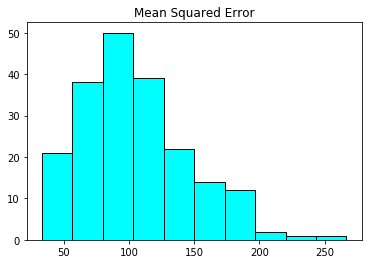

In [58]:
plt.hist(errors,edgecolor="black",color="cyan");
plt.title("Mean Squared Error")

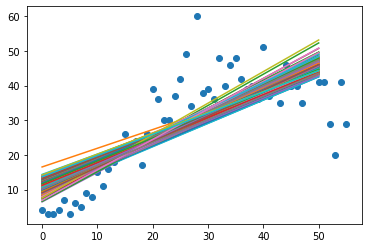

In [59]:
plt.scatter(x, yvals)
for repeat in range(200):
    xtrain,xtest,ytrain,ytest=train_test_split(x, yvals)   # split
    b,a=np.polyfit(xtrain,ytrain,1)                   # linear fit
    plt.plot([0,50],[a+b*0, a+b*50])

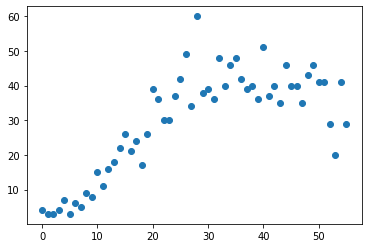

In [60]:
plt.scatter(x, yvals)

In [61]:
def fit_a_polynomial(X,Y,degree):
    xtrain,xtest,ytrain,ytest=train_test_split(X,Y)
    fit=np.polyfit(xtrain,ytrain,degree) # polynomial coefficients of degree degree
    ypredicted=np.polyval(fit,xtest)     # input: coefficients (ouput of polyfit); output: yvalues
    error=mean_squared_error(ytest,ypredicted)
    return(error)
fit_a_polynomial(x,yvals,1)

33.76680561617386

In [64]:
[fit_a_polynomial(x,yvals,2) for j in range(10)] # MSE for 10 runs of degree 2

[28.13919091952379,
 50.95200595050464,
 59.616832887416024,
 37.78146730658659,
 38.70770604408244,
 19.673732249325266,
 71.7324497833149,
 23.94995027602149,
 64.2931593858462,
 37.85745942944851]

In [81]:
degrees=list(range(1,11))
means=[]
sigmas=[]
for deg in degrees:
    errors=[]
    for repeat in range(200):
        errors.append(fit_a_polynomial(x,yvals,deg))
    means.append(np.mean(errors)) # add the mean error for next degree
    sigmas.append(np.std(errors)) # add the std error for next degree
    
print(means)
print(sigmas)

[106.20036398995488, 44.52523378012942, 42.412613191476694, 37.60268330573568, 40.63892100717145, 42.52570691326751, 51.51769547982229, 65.08506893962236, 81.48994328246587, 155.0745922764259]
[45.296067673413305, 18.31949573747974, 18.818879973411672, 15.700997296345168, 17.54494982140959, 29.916887618876764, 50.519436125415965, 77.57749631466753, 128.36704539486527, 350.4230241139879]


In [66]:
means

[106.82729913556742,
 44.19463185268042,
 41.04527551869633,
 38.738923031066406,
 40.706341861434915,
 41.151345900359765,
 54.68778894135627,
 64.47994680083029,
 75.35856381596554,
 87.51429838152762]

In [68]:
sigmas

[38.47171771463136,
 18.19815482042808,
 17.368543530951126,
 16.715527227254356,
 21.874217912227877,
 23.318106893907377,
 56.85082207057571,
 80.38690394103918,
 101.35765207140084,
 162.4137589076651]

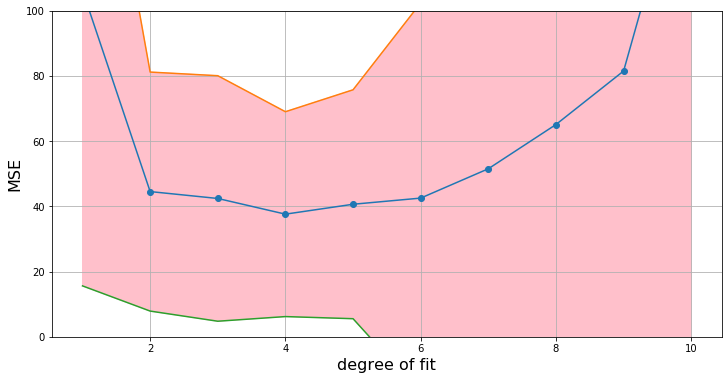

In [82]:
plt.plot(degrees,means,marker="o")
plt.plot(degrees,np.array(means)+2*np.array(sigmas)) # 95% 
plt.plot(degrees,np.array(means)-2*np.array(sigmas))
plt.fill_between(degrees, np.array(means)+2*np.array(sigmas), np.array(means)-2*np.array(sigmas), color="pink")
plt.ylim(0,100)
plt.grid()
plt.xlabel("degree of fit",fontsize=16)
plt.ylabel("MSE",fontsize=16)
plt.gcf().set_size_inches(12,6)

[ 0.69825701 10.63721805]
[-0.03337399  2.53382653 -5.8829077 ]
[-5.47591392e-04  1.18022984e-02  1.54887390e+00 -1.57308965e+00]
[ 3.89612551e-05 -4.83332945e-03  1.62443208e-01 -2.54197328e-01
  2.98277235e+00]


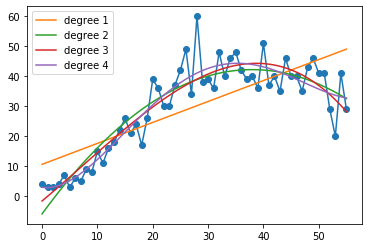

In [88]:
plt.plot(x,yvals,marker="o")
xplot=np.linspace(0,55,100)
for deg in 1,2,3,4:
    fit=np.polyfit(x,yvals,deg)
    yp=np.polyval(fit,xplot)
    plt.plot(xplot,yp,label="degree "+str(deg))
    print(fit)
plt.legend()

[ 0.69825701 10.63721805]
[-0.03337399  2.53382653 -5.8829077 ]
[-5.47591392e-04  1.18022984e-02  1.54887390e+00 -1.57308965e+00]
[ 3.89612551e-05 -4.83332945e-03  1.62443208e-01 -2.54197328e-01
  2.98277235e+00]


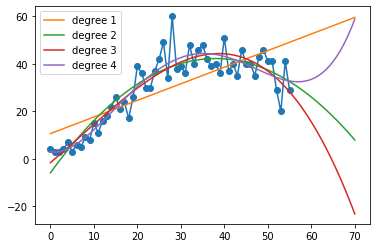

In [90]:
plt.plot(x,yvals,marker="o")
xplot=np.linspace(0,70,100)
for deg in 1,2,3,4:
    fit=np.polyfit(x,yvals,deg)
    yp=np.polyval(fit,xplot)
    plt.plot(xplot,yp,label="degree "+str(deg))
    print(fit)
plt.legend()

In [91]:
# you can't extrapolate